<a href="https://colab.research.google.com/github/AlienX77-cmd/Computational-Finance/blob/main/Computational_Finance_Homework_ARIMA_6310505688_Kittipak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --no-cache-dir git+https://github.com/nobitex/tvdatafeed

  Cloning https://github.com/nobitex/tvdatafeed to /tmp/pip-req-build-41wo4b4e
  Running command git clone --filter=blob:none --quiet https://github.com/nobitex/tvdatafeed /tmp/pip-req-build-41wo4b4e
  Resolved https://github.com/nobitex/tvdatafeed to commit a7034f04509b67224618917c29272796e4fff858
  Preparing metadata (setup.py) ... done
  Created wheel for tvdatafeed: filename=tvdatafeed-2.1.0-py3-none-any.whl size=7548 sha256=1fa09ef758ba2826eba86bcdde476c1f7b11a1f8b519ee3d5ec75a3caea33de2
  Stored in directory: /tmp/pip-ephem-wheel-cache-lii6b0u8/wheels/f4/2b/58/a3e84d514f020d6f433c641058e75b7ac3ea2bdf5ea7ffd0c6
Successfully built tvdatafeed


In [ ]:
from tvDatafeed import TvDatafeed
tv = TvDatafeed()

In [ ]:
from tvDatafeed import TvDatafeed, Interval
from datetime import datetime
username = 'SleepingDragon77'
password = 'DataFinanceOP?y9'
#tv = TvDatafeed(username, password, chromedriver_path=None)
tv = TvDatafeed()

In [ ]:
now = datetime.now()
print("now =", now)
data=tv.get_hist(symbol='XAUUSD', exchange='OANDA', interval=Interval.in_daily, n_bars=5000)
data

now = 2023-10-10 05:29:21.229512


,symbol,open,high,low,close,volume
datetime,,,,,,
2004-06-29 21:00:00,OANDA:XAUUSD,392.100,396.600,391.900,393.500,0.0
2004-06-30 21:00:00,OANDA:XAUUSD,393.500,396.100,393.300,395.700,0.0
2004-07-01 21:00:00,OANDA:XAUUSD,395.800,400.800,388.400,397.800,0.0
2004-07-04 21:00:00,OANDA:XAUUSD,397.700,399.000,397.500,398.000,0.0
2004-07-05 21:00:00,OANDA:XAUUSD,398.000,399.100,388.900,392.400,0.0
...,...,...,...,...,...,...
2023-10-03 21:00:00,OANDA:XAUUSD,1822.905,1830.675,1816.640,1821.315,168620.0
2023-10-04 21:00:00,OANDA:XAUUSD,1821.315,1829.225,1813.030,1820.300,139390.0
2023-10-05 21:00:00,OANDA:XAUUSD,1820.300,1834.920,1810.465,1832.035,163231.0


In [188]:
df = data['close']
df = pd.DataFrame(df)
df.head(5)

,close
datetime,
2004-06-29 21:00:00,393.5
2004-06-30 21:00:00,395.7
2004-07-01 21:00:00,397.8
2004-07-04 21:00:00,398.0
2004-07-05 21:00:00,392.4


In [189]:
df.index = df.index.date

In [190]:
df.index

Index([2004-06-29, 2004-06-30, 2004-07-01, 2004-07-04, 2004-07-05, 2004-07-06,
       2004-07-07, 2004-07-08, 2004-07-11, 2004-07-12,
       ...
       2023-09-26, 2023-09-27, 2023-09-28, 2023-10-01, 2023-10-02, 2023-10-03,
       2023-10-04, 2023-10-05, 2023-10-08, 2023-10-09],
      dtype='object', length=5000)

In [193]:
#string to date format
df.index = pd.to_datetime(df.index,infer_datetime_format=True)
#df = df.set_index(['Month'])
df.head(5)

,close
2004-06-29,393.5
2004-06-30,395.7
2004-07-01,397.8
2004-07-04,398.0
2004-07-05,392.4


In [194]:
df.index

DatetimeIndex(['2004-06-29', '2004-06-30', '2004-07-01', '2004-07-04',
               '2004-07-05', '2004-07-06', '2004-07-07', '2004-07-08',
               '2004-07-11', '2004-07-12',
               ...
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-10-01',
               '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05',
               '2023-10-08', '2023-10-09'],
              dtype='datetime64[ns]', length=5000, freq=None)

In [191]:
df.head(5)

,close
2004-06-29,393.5
2004-06-30,395.7
2004-07-01,397.8
2004-07-04,398.0
2004-07-05,392.4


In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

#import warnings
#warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

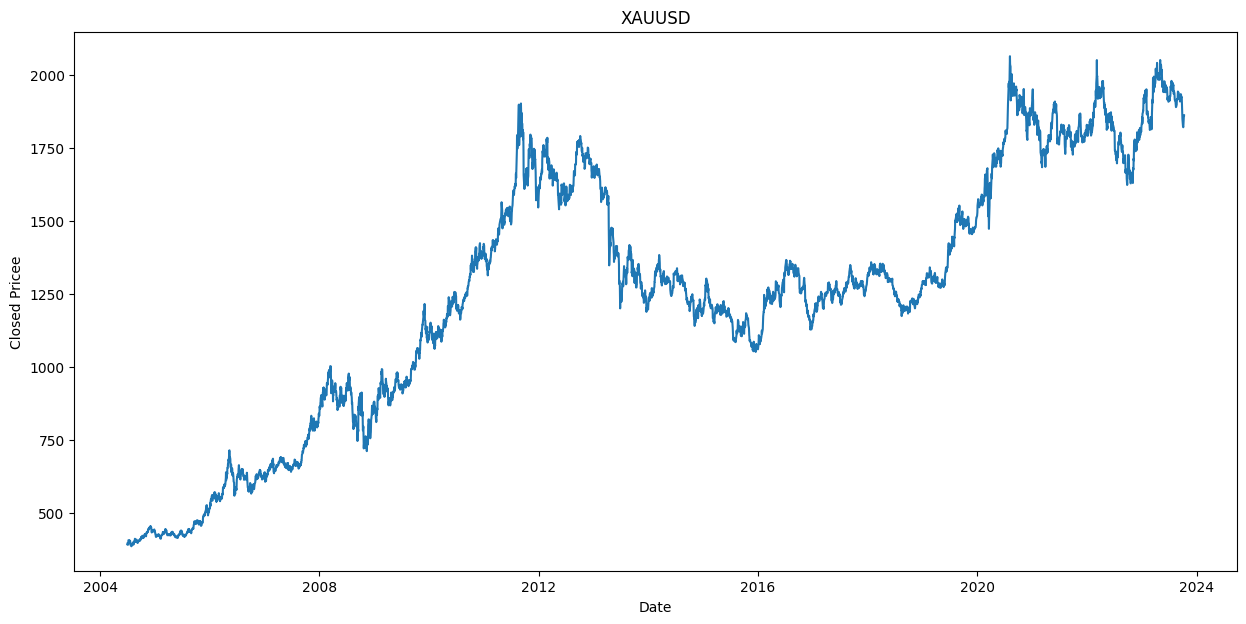

In [ ]:
# At first glance, there looks to be a positive trend

plt.figure(figsize=(15,7))
plt.title("XAUUSD")
plt.xlabel('Date')
plt.ylabel('Closed Pricee')
plt.plot(data['close'])
plt.show()

## <center> Rolling Statistics

A rolling average is a great way to visualize how the dataset is trending. As the dataset provides counts by month, a window size of 12 will give us the annual rolling average.

We will also include the rolling standard deviation to see how much the data varies from the rolling average.

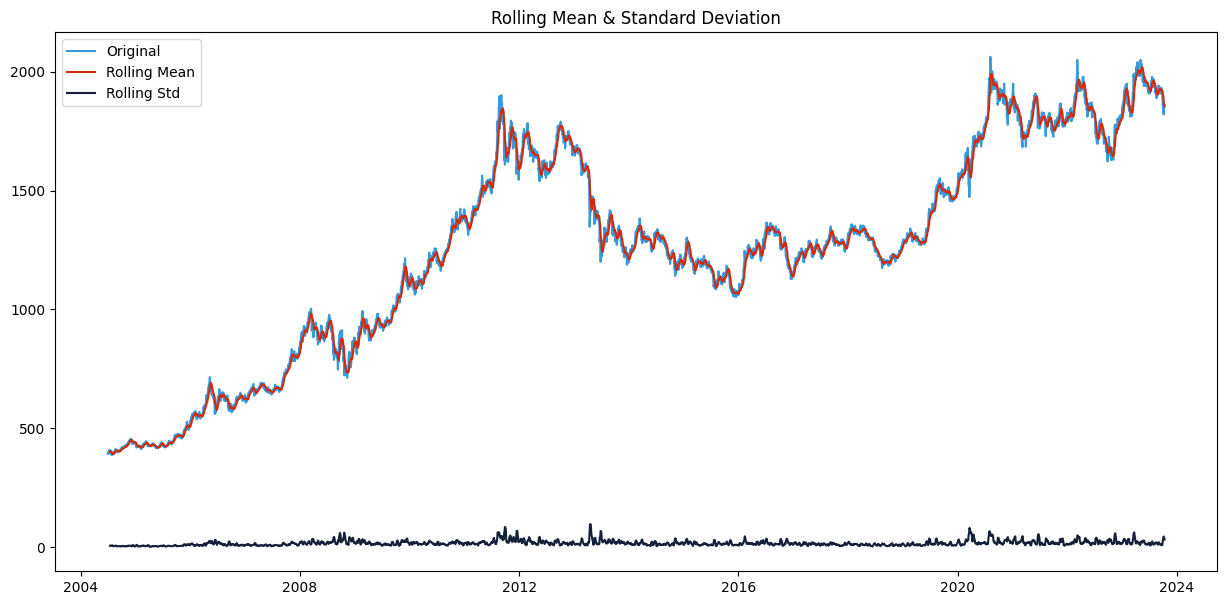

In [ ]:
# Determine rolling statistics
data["rolling_avg"] = data['close'].rolling(window=12).mean() # window size 12 denotes 12 months, giving rolling mean at yearly level
data["rolling_std"] = data['close'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(data["close"], color='#379BDB', label='Original')
plt.plot(data["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(data["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## <center>Augmented Dickey–Fuller Test</center>

The Augmented Dickey-Fuller Test is used to determine if time-series data is stationary or not. Similar to a t-test, we set a significance level before the test and make conclusions on the hypothesis based on the resulting p-value.

<B>Null Hypothesis:</B> The data is not stationary.

<B>Alternative Hypothesis:</B> The data is stationary.

For the data to be stationary (ie. reject the null hypothesis), the ADF test should have:

- p-value <= significance level (0.01, 0.05, 0.10, etc.)

If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

We can see in the ADF test below that the p-value is 0.515769, meaning that it is very likely that the data is not stationary.

In [ ]:
# Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(data['close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -1.535729
p-value                           0.515769
#Lags Used                        0.000000
Number of Observations Used    4999.000000
Critical Value (1%)              -3.431659
Critical Value (5%)              -2.862118
Critical Value (10%)             -2.567078
dtype: float64


## <center>ARIMA Model Selection w/ Auto-ARIMA</center>

Although our data is almost certainly not stationary (p-value = 0.515769), let's see how well a standard ARIMA model performs on the time series

Using the auto_arima function from the `pmdarima` package, we can perform a parameter search for the optimal values of the model.


IMPORTANT NOTE:
- When we print out the model summary after training, the header will be SARIMAX regardless of what model parameters we use. If we set the seasonality to FALSE or the m parameter to 1 then we have a standard ARIMA model. This will be what we train first. See this Stack Overflow question for more information --> [auto_arima(... , seasonal=False) but got SARIMAX?](https://stackoverflow.com/questions/69528507/auto-arima-seasonal-false-but-got-sarimax)

In [208]:
# Standard ARIMA Model
ARIMA_model = pm.auto_arima(data['close'],
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)
print(ARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -20107.485
Date:                Tue, 10 Oct 2023   AIC                          40218.971
Time:                        09:42:53   BIC                          40232.005
Sample:                             0   HQIC                         40223.539
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2936      0.195      1.505      0.132      -0.089       0.676
sigma2       182.4956      1.742    104.775      0.000     179.082     185.909
Ljung-Box (L1) (Q):                   1.09   Jarque-

## <center>Model Diagnostics</center>

Four plots result from the plot_diagnostics function. The Standardized residual, Histogram plus KDE estimate, Normal q-q, and a correlogram.

We can interpret the model as a good fit based on the following conditions.

Standardized residual
- There are no obvious patterns in the residuals, with values having a mean of zero and having a uniform variance.

Histogram plus KDE estimate
- The KDE curve should be very similar to the normal distribution (labeled as N(0,1) in the plot)

Normal Q-Q
- Most of the data points should lie on the straight line

Correlogram (ACF plot)
- 95% of correlations for lag greater than zero should not be significant. The grey area is the confidence band, and if values fall outside of this then they are statistically significant. In our case, there are a few values outside of this area, and therefore we may need to add more predictors to make the model more accurate

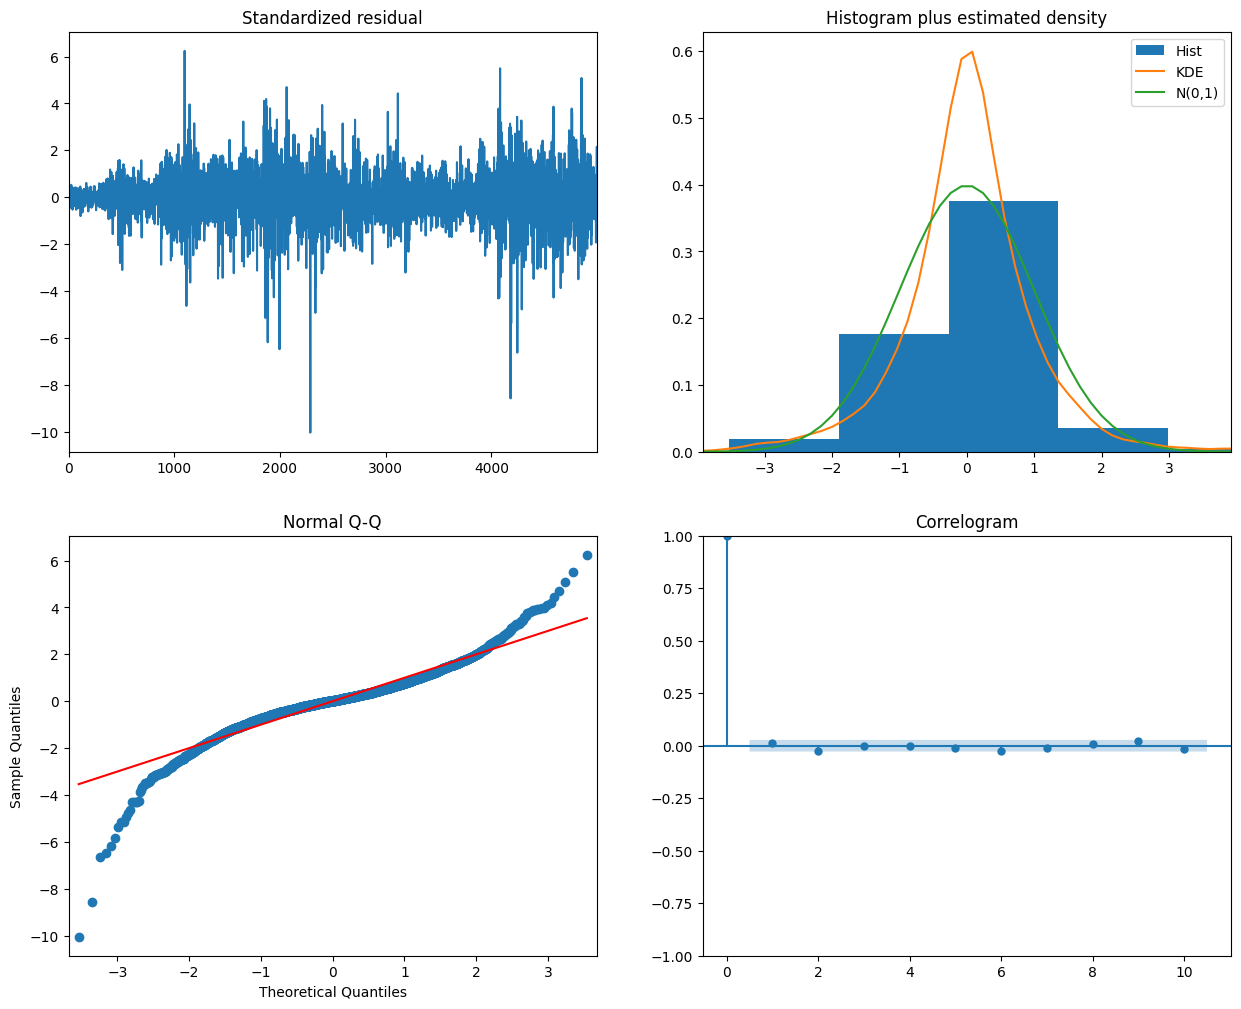

In [209]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

We can then use the model to forecast XAUUSD closed price for over the next 24 months.

As we can see from the plot below, this doesn't seem to be a very accurate forecast. Maybe we need to change the model structure so that it takes into account seasonality

In [222]:
# Forecast
n_periods = 24
fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

# make series for plotting purpose
fitted.index = index_of_fc

print(fitted)

2023-12-01 21:00:00    1861.718644
2024-01-01 21:00:00    1862.012287
2024-02-01 21:00:00    1862.305931
2024-03-01 21:00:00    1862.599575
2024-04-01 21:00:00    1862.893219
2024-05-01 21:00:00    1863.186862
2024-06-01 21:00:00    1863.480506
2024-07-01 21:00:00    1863.774150
2024-08-01 21:00:00    1864.067794
2024-09-01 21:00:00    1864.361437
2024-10-01 21:00:00    1864.655081
2024-11-01 21:00:00    1864.948725
2024-12-01 21:00:00    1865.242368
2025-01-01 21:00:00    1865.536012
2025-02-01 21:00:00    1865.829656
2025-03-01 21:00:00    1866.123300
2025-04-01 21:00:00    1866.416943
2025-05-01 21:00:00    1866.710587
2025-06-01 21:00:00    1867.004231
2025-07-01 21:00:00    1867.297875
2025-08-01 21:00:00    1867.591518
2025-09-01 21:00:00    1867.885162
2025-10-01 21:00:00    1868.178806
2025-11-01 21:00:00    1868.472449
Freq: MS, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [223]:
fitted_series = pd.Series(fitted, index=index_of_fc)
print(fitted_series)

2023-12-01 21:00:00    1861.718644
2024-01-01 21:00:00    1862.012287
2024-02-01 21:00:00    1862.305931
2024-03-01 21:00:00    1862.599575
2024-04-01 21:00:00    1862.893219
2024-05-01 21:00:00    1863.186862
2024-06-01 21:00:00    1863.480506
2024-07-01 21:00:00    1863.774150
2024-08-01 21:00:00    1864.067794
2024-09-01 21:00:00    1864.361437
2024-10-01 21:00:00    1864.655081
2024-11-01 21:00:00    1864.948725
2024-12-01 21:00:00    1865.242368
2025-01-01 21:00:00    1865.536012
2025-02-01 21:00:00    1865.829656
2025-03-01 21:00:00    1866.123300
2025-04-01 21:00:00    1866.416943
2025-05-01 21:00:00    1866.710587
2025-06-01 21:00:00    1867.004231
2025-07-01 21:00:00    1867.297875
2025-08-01 21:00:00    1867.591518
2025-09-01 21:00:00    1867.885162
2025-10-01 21:00:00    1868.178806
2025-11-01 21:00:00    1868.472449
Freq: MS, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


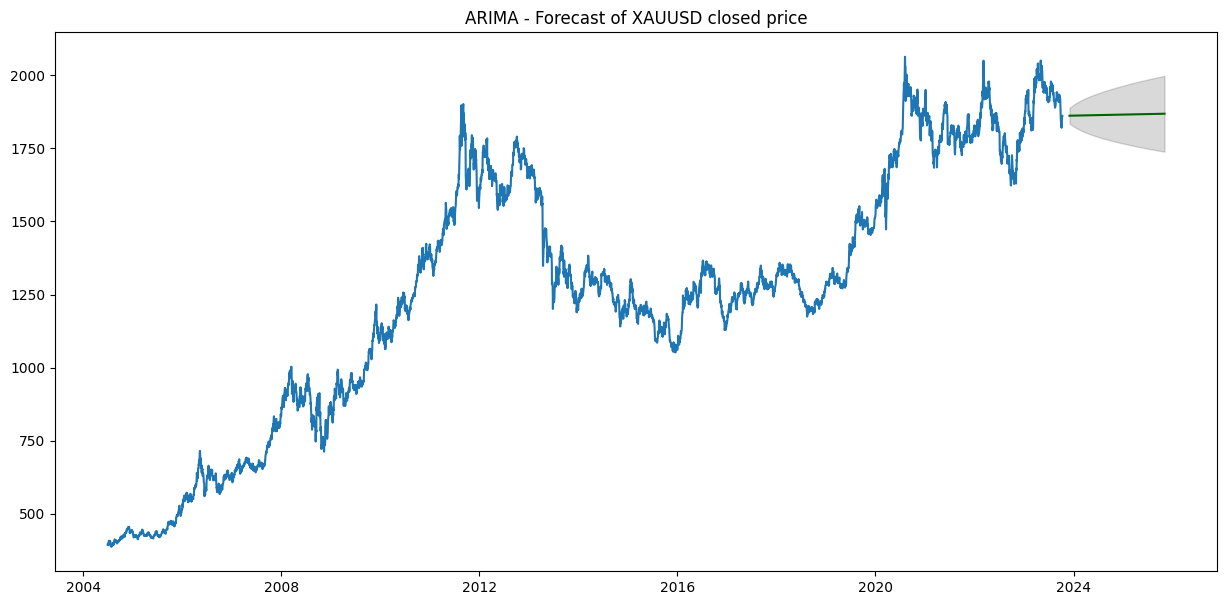

In [224]:
def forecast(ARIMA_model, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted.index = index_of_fc
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(data["close"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)

    plt.title("ARIMA - Forecast of XAUUSD closed price")
    plt.show()

forecast(ARIMA_model)

## <center>SARIMA Model Selection</center>

Now let's try the same strategy as we did above, except let's use a SARIMA model so that we can account for seasonality.

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(data['close'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3,
                         m=12, #12 is the frequncy of the cycle
                         start_P=0,
                         seasonal=True, #set to seasonal
                         d=None,
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

Taking a look at the model diagnostics, we can see some significant differences when compared with the standard ARIMA model.

Standardized residual
- The Standardized residual is much more consistent across the graph, meaning that the data is closer to being stationary.

Histogram plus KDE estimate
- The KDE curve is similar to the normal distribution (not much changed here).

Normal Q-Q
- The data points are clustered much closer to the line than in the ARIMA diagnostic plot.

Correlogram (ACF plot)
- The grey area is the confidence band, and if values fall outside of this then they are statistically significant. We want all values inside this area. Adding the seasonality component did this! All the points now fall within the 95% confidence interval.

In [ ]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()